<a href="https://colab.research.google.com/github/Aarunimaa/CodSoft-Internship-Projects/blob/main/Advertisement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **In this project the method of Multiple Linear Regression has been used to predict the Sales outcome depending on the advertising channels.**



***Importing Data***

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
df=pd.read_csv('/content/drive/MyDrive/CODSOFT/advertising.csv')

***Data Description***

The Advertisement Sales Dataset contains information on advertising expenditures across various media channels, including TV, Newspaper, and Radio, along with the corresponding sales figures. The dataset aims to explore the impact of different advertising streams on product sales and enable insights into effective advertising strategies.

***Data Overview***

In [117]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


There are 200 rows and 4 columns in the dataset.

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There are no null values in any of the columns. Hence we can proceed with further analysis without any other data preprocessing.

***Separating Feature and Target variables***

In [118]:
feature=df.drop(['Sales'],axis=1)
target=df.Sales

Here, Sales is our target variable and TV, Newspaper and Radio are our feature variables.

***Quick EDA of the variables***

Let us plot the boxplots of the Feature variables. Notched boxplot is used for a better visualization.

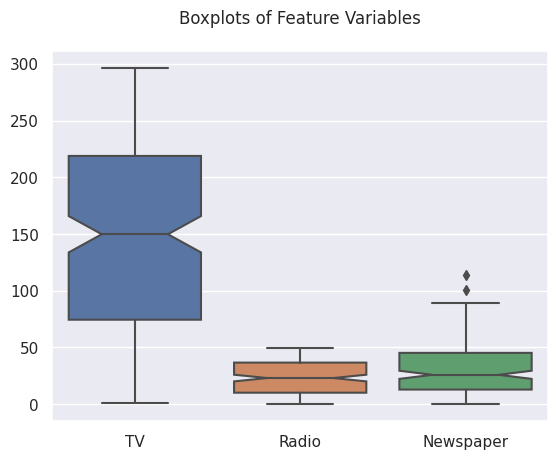

In [135]:
sns.set(style="darkgrid")
sns.boxplot(data=feature,notch=True)
plt.title("Boxplots of Feature Variables",pad=20)
plt.show()

From the graphs we can see only Newspaper has two outliers, which will not have any significant impact on our model. \
Other variables have no outliers.\
All the variables are more or less equally distributed around their respective medians.

Let us also plot the boxplot of the Target variable, Sales.

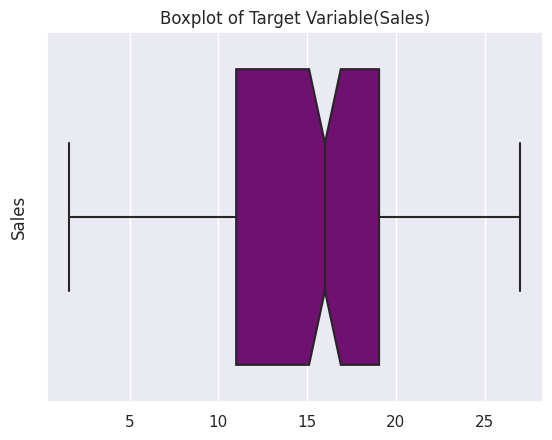

In [123]:
sns.set(style="darkgrid")
ax = sns.boxplot(x=target,notch=True,color='purple')
ax.set_title("Boxplot of Target Variable(Sales)")
ax.set_ylabel("Sales")
ax.set_xlabel("")
plt.show()

We can see that Sales does not have any outliers.

***Pairwise Scatterplots***

We plot the pairwise scatterplots of the feature variables with Sales to visualize if there is any pattern among them.

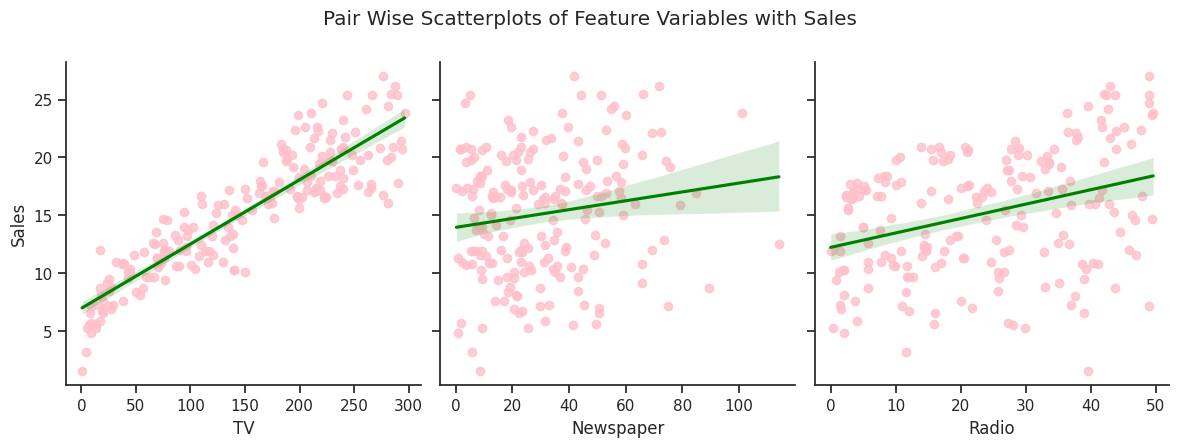

In [151]:
sns.set(style="ticks")
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', kind='reg',
              height=4, aspect=1,
              plot_kws={'color':'pink', 'line_kws': {'color': 'green'}}, )
plt.suptitle("Pair Wise Scatterplots of Feature Variables with Sales",y=1.1)
plt.show()

We can see that TV has an almost linear pattern with **Sales**, making it the **most important feature** of our analysis. Other two variables, however does not have a very strong correlation.

***Correlation Heatmap***

We plot a heatmap to visualize the exact correlations of the feature variables with each other and the target variable.

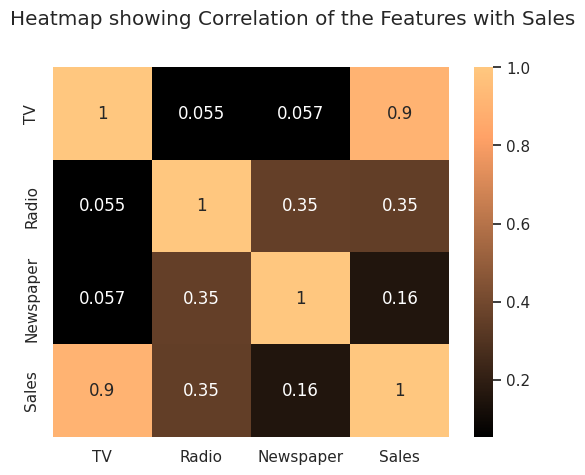

In [ ]:
sns.heatmap(df.corr(), cmap="copper", annot = True)
plt.suptitle("Heatmap showing Correlation of the Features with Sales",y=1)
plt.show()

From the heatmap also it is quite evident that TV has the highest correlation with Sales, making it our most impoertant feature of our model.

***Model Fitting***

We divide the data into training and test dataset, with 75% of the data in training set and 25% of the data in the test set.

In [125]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.25, random_state=50)

Then we fit the multiple **Linear Regression** model.

In [126]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

We need to see the coefficients of the feature variables to determine our fitted model.

In [127]:
coef_df = pd.DataFrame({'Feature': feature.columns, 'Coefficient': model.coef_})
print("Coefficient Values:")
print(coef_df)
print("Intercept:", model.intercept_)

Coefficient Values:
     Feature  Coefficient
0         TV     0.055186
1      Radio     0.103890
2  Newspaper     0.005038
Intercept: 4.449770723493732


Hence, the model comes out as: \
**Sales= 4.449 + 0.055 × TV + 0.103 × Radio + 0.005 × Newspaper**

***Interpretation***

The interpretation of the model is as follows:


*   If all the advertisement channels are kept constant, the Sales is 4.449 units.
*   Keeping Radio and Newspaper constant, one unit increase in TV expenditure increases Sales by 0.055 times the expenditure.
*   Keeping TV and Newspaper constant, one unit increase in Radio expenditure increases Sales by 0.103 times the expenditure.
*   Keeping Radio and TV constant, one unit increase in Newspaper expenditure increases Sales by 0.005 times the expenditure.


From the above interpretation, we see that Sales increases the most by investing in advertisements through Radio.

***Actual vs Predicted Plot***

We plot the test dataset and fit a straight line to depict the predicted values on the test dataset.

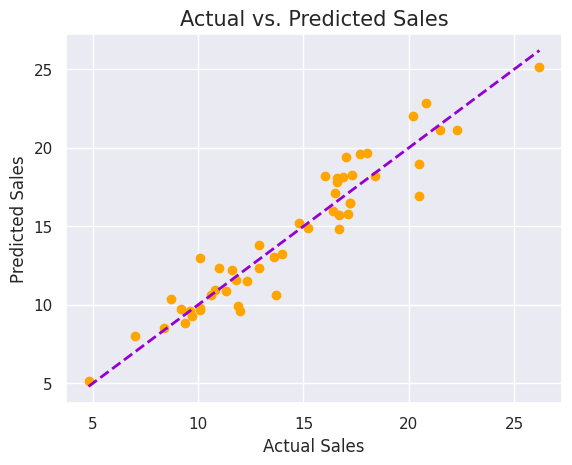

In [128]:
plt.scatter(y_test, y_pred, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='darkviolet', linewidth=2)  # Plot predicted model line
plt.title('Actual vs. Predicted Sales', fontsize=15)
plt.xlabel('Actual Sales', fontsize=12)
plt.ylabel('Predicted Sales', fontsize=12)
plt.show()

The diagram shows that the predicted values are a good fit.

***Model Performance***

We check the accuracy of our model using the test mean squared error(MSE) and the R2 value.

In [130]:
mse = mean_squared_error(y_test, y_pred)
print(f"The mean squared error of the model is : {mse:0.5f}")
r_squared = r2_score(y_test, y_pred)
print(f"The r-squared value of the model is : {r_squared:0.5f}")

The mean squared error of the model is : 1.88740
The r-squared value of the model is : 0.90278


The test MSE is very low and the R2 value if very high.\
It means that almost 90.278% of the variance in the Sales is efficiently explained by the feature variables through our model.


***Distribution of the Residuals***

We need to check if the distribution of the residuals is standard normal or not, which is our primary assumption before proceeding with any linear regression model.

To check that, we plot a histogram of the residuals and check its mean and variance.

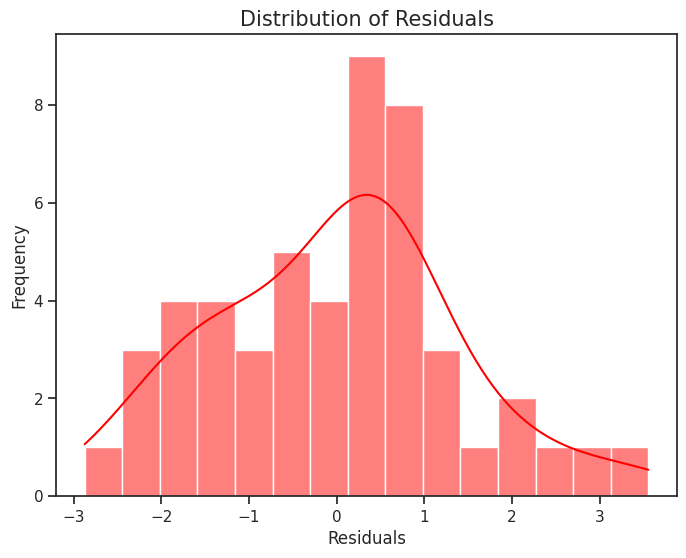



Mean of Residuals: -0.0192
Variance of Residuals: 1.8870


In [153]:
res=y_test-y_pred
plt.figure(figsize=(8, 6))
sns.histplot(res, bins=15, kde=True, color='red')
plt.title('Distribution of Residuals', fontsize=15)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()
print("\n")
mean_res=np.mean(res)
print(f"Mean of Residuals: {mean_res:.4f}")
var_res=np.var(res)
print(f"Variance of Residuals: {var_res:.4f}")

From the graph we see that the curve is somewhat bellshaped in nature and the mean and variance comes out to be around 0 and 1 respectively. So we can say that our assumption is valid and our model is capable of predicting values efficiently.